In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../io/bkst.csv')
df.head()

,first,second,third,fourth,last
0,dribble,pass,run,run,run
1,run,screen,receive,dribble,shoot
2,run,screen,corner,receive,shoot
3,corner,stand,stand,run,screen
4,dribble,pass,stand,receive,dribble


In [3]:
inputs = df.drop('last',axis=1)
target = df['last']

In [4]:
steps = pd.DataFrame()

In [5]:
steps['le_first'] = LabelEncoder().fit_transform(inputs[inputs.columns[0]])
steps['le_second'] = LabelEncoder().fit_transform(inputs[inputs.columns[1]])
steps['le_third'] = LabelEncoder().fit_transform(inputs[inputs.columns[2]])
steps['le_fourth'] = LabelEncoder().fit_transform(inputs[inputs.columns[3]])

In [6]:
tree = DecisionTreeClassifier()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(steps, target, test_size = 0.3)
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
tree.score(X_test,y_test)

0.3333333333333333

In [12]:
y_pred=tree.predict(X_test)

In [10]:
y_test

1       shoot
4     dribble
14        run
12      shoot
28      stand
11        run
21        run
17      shoot
20      stand
Name: last, dtype: object

In [13]:
cm = confusion_matrix(y_test,y_pred)

In [14]:
cm

array([[0, 0, 0, 1, 0],
       [0, 2, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 2],
       [0, 1, 0, 0, 1]])

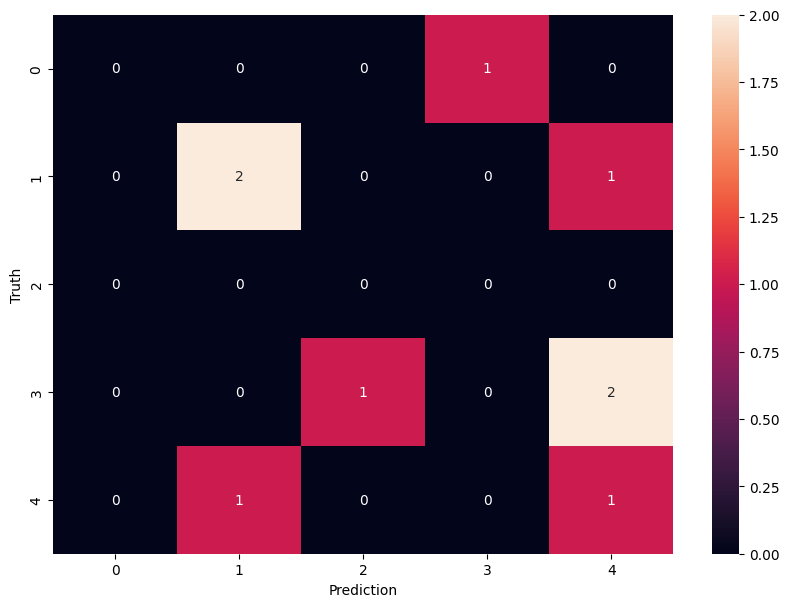

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()